# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

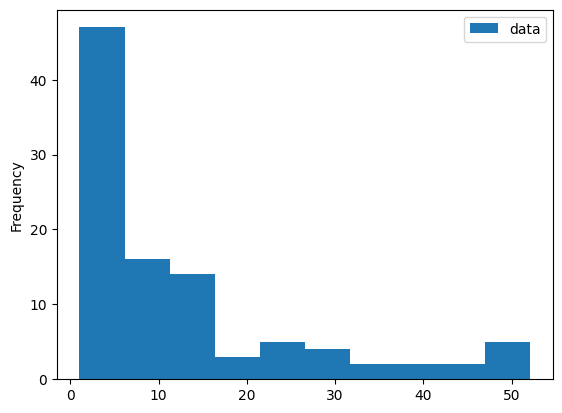

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

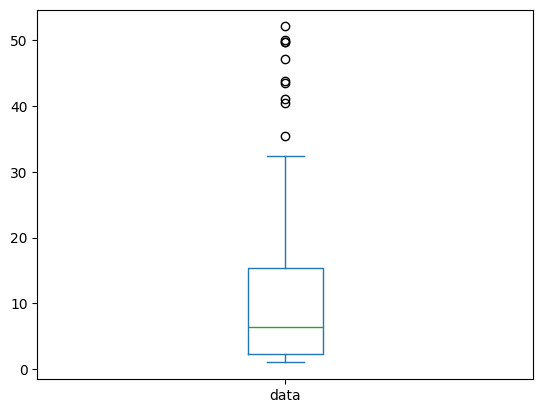

In [3]:
df.plot.box()

I don't find either plot particularly engaging for answering the original question. Both visuals lack significant context without titles, axes, or visuals that clearly highlight high priced drugs.I find the histogram slightly better as you can clearly see the long tail of expensive drugs and the high frequency of drugs under $15. The box plot does show the outliers but they overlap and it's difficult to see the frequency across the population.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
from fpdf import FPDF
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

In [20]:
# Function to calculate summary stats
def calculate_statistics(column):
    non_null_count = df[column].count()
    unique_count = df[column].nunique()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0] if not df[column].mode().empty else np.nan
    std_dev = df[column].std()
    variance = df[column].var()
    minimum = df[column].min()
    maximum = df[column].max()
    value_range = maximum - minimum
    
    return {
        'non_null_count': non_null_count,
        'unique_count': unique_count,
        'mean': mean,
        'median': median,
        'mode': mode,
        'std_dev': std_dev,
        'variance': variance,
        'min': minimum,
        'max': maximum,
        'range': value_range
    }

def generate_plots(df, sample_amt, output_to_pdf, ds_name):
    # Get current timestamp for the PDF filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    pdf_filename = f"output/statistics_plots_{ds_name}_{timestamp}.pdf"
    
    if output_to_pdf:
        pdf_pages = PdfPages(pdf_filename)
        
        # Add title page
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')
        title_text = f"Variable Analysis of the {ds_name} Dataset"
        ax.text(0.5, 0.5, title_text, ha='center', va='center', fontsize=24, fontweight='bold')
        pdf_pages.savefig(fig)
        plt.close(fig)
    
    # Iterate over each numeric column
    for column in df.select_dtypes(include=[np.number]).columns:
        if df[column].dropna().empty:
            continue  # Skip this column if it is entirely NaN
        
        stats = calculate_statistics(column)
        
        if output_to_pdf:
            # Create a new figure for each column's statistics
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.axis('off')
            text = f"Statistics for {column}:\n"
            text += f"Count Non Nulls: {stats['non_null_count']}\n"
            text += f"Count Unique: {stats['unique_count']}\n"
            text += f"Mean: {stats['mean']:.1f}\n"
            text += f"Median: {stats['median']:.1f}\n"
            text += f"Mode: {stats['mode']:.1f}\n"
            text += f"Standard Deviation: {stats['std_dev']:.1f}\n"
            text += f"Variance: {stats['variance']:.1f}\n"
            text += f"Minimum: {stats['min']:.1f}\n"
            text += f"Maximum: {stats['max']:.1f}\n"
            text += f"Range: {stats['range']:.1f}\n"
            ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12)
            pdf_pages.savefig(fig)
            plt.close(fig)
        else:
            print(f"Statistics for {column}:")
            print(f"Count Non Nulls: {stats['non_null_count']}")
            print(f"Count Unique: {stats['unique_count']}")
            print(f"Mean: {stats['mean']:.1f}")
            print(f"Median: {stats['median']:.1f}")
            print(f"Mode: {stats['mode']:.1f}")
            print(f"Standard Deviation: {stats['std_dev']:.1f}")
            print(f"Variance: {stats['variance']:.1f}")
            print(f"Minimum: {stats['min']:.1f}")
            print(f"Maximum: {stats['max']:.1f}")
            print(f"Range: {stats['range']:.1f}\n")
        
        # Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        # KDE plot
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[column], fill=True)
        plt.title(f'KDE Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        # Violin plot
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=df[column])
        plt.title(f'Violin Plot of {column}')
        plt.xlabel(column)
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        # Swarm plot
        if df[column].dropna().shape[0] >= sample_amt:
            sns.swarmplot(x=df[column].dropna().sample(n=sample_amt), size=3)
        else:
            sns.swarmplot(x=df[column].dropna(), size=3)
        plt.title(f'Swarm Plot of {column}')
        plt.xlabel(column)
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        # Grouped histograms by top 5 categorical values
        for cat_column in df.select_dtypes(include=['object']).columns:
            top_values = df[cat_column].value_counts().index[:5]
            df_filtered = df[df[cat_column].isin(top_values)]
            
            if df_filtered[column].dropna().empty:
                continue  # Skip if the filtered DataFrame is empty
            
            plt.figure(figsize=(10, 6))
            sns.histplot(data=df_filtered, x=column, hue=cat_column, multiple="dodge", shrink=.8)
            plt.title(f'Grouped Histogram of {column} by {cat_column} (Top 5 Values)')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            if output_to_pdf:
                pdf_pages.savefig()
                plt.close()
            else:
                plt.show()
    
    if output_to_pdf:
        pdf_pages.close()
        print(f"PDF saved as {pdf_filename}")

# Example usage
# generate_plots(df, sample_amt=100, output_to_pdf=True, ds_name='Ames Housing')  # Save to PDF
# generate_plots(df, sample_amt=100, output_to_pdf=False, ds_name='Ames Housing') # Print and show plots


In [9]:
'''ANALYZE A SINGLE COLUMN'''

# Function to calculate summary stats
def calculate_statistics_column(df, column):
    non_null_count = df[column].count()
    unique_count = df[column].nunique()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0] if not df[column].mode().empty else np.nan
    std_dev = df[column].std()
    variance = df[column].var()
    minimum = df[column].min()
    maximum = df[column].max()
    value_range = maximum - minimum
    
    return {
        'non_null_count': non_null_count,
        'unique_count': unique_count,
        'mean': mean,
        'median': median,
        'mode': mode,
        'std_dev': std_dev,
        'variance': variance,
        'min': minimum,
        'max': maximum,
        'range': value_range
    }

# Function to analyze and visualize a single numeric column
def analyze_column(df, column, sample_amt, output_to_pdf, pdf_pages=None):
    stats = calculate_statistics_column(df, column)
    
    if output_to_pdf and pdf_pages:
        # Create a new figure for the column's statistics
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')
        text = f"Statistics for {column}:\n"
        text += f"Count Non Nulls: {stats['non_null_count']}\n"
        text += f"Count Unique: {stats['unique_count']}\n"
        text += f"Mean: {stats['mean']:.1f}\n"
        text += f"Median: {stats['median']:.1f}\n"
        text += f"Mode: {stats['mode']:.1f}\n"
        text += f"Standard Deviation: {stats['std_dev']:.1f}\n"
        text += f"Variance: {stats['variance']:.1f}\n"
        text += f"Minimum: {stats['min']:.1f}\n"
        text += f"Maximum: {stats['max']:.1f}\n"
        text += f"Range: {stats['range']:.1f}\n"
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12)
        pdf_pages.savefig(fig)
        plt.close(fig)
    else:
        print(f"Statistics for {column}:")
        print(f"Count Non Nulls: {stats['non_null_count']}")
        print(f"Count Unique: {stats['unique_count']}")
        print(f"Mean: {stats['mean']:.1f}")
        print(f"Median: {stats['median']:.1f}")
        print(f"Mode: {stats['mode']:.1f}")
        print(f"Standard Deviation: {stats['std_dev']:.1f}")
        print(f"Variance: {stats['variance']:.1f}")
        print(f"Minimum: {stats['min']:.1f}")
        print(f"Maximum: {stats['max']:.1f}")
        print(f"Range: {stats['range']:.1f}\n")
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # Violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[column])
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # Swarm plot
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x=df[column].sample(n=sample_amt), size=3)
    plt.title(f'Swarm Plot of {column}')
    plt.xlabel(column)
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # Grouped histograms by top 5 categorical values
    for cat_col in df.select_dtypes(include=['object']).columns:
        top_categories = df[cat_col].value_counts().nlargest(5).index
        plt.figure(figsize=(10, 6))
        for category in top_categories:
            sns.histplot(df[df[cat_col] == category][column], kde=False, label=category, alpha=0.6)
        plt.title(f'Histogram of {column} grouped by {cat_col}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend(title=cat_col)
        if output_to_pdf and pdf_pages:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()

# Example usage
# analyze_column(df, 'numeric_column', sample_amt=100, output_to_pdf=True, pdf_pages=pdf_pages)  # Save to PDF
# analyze_column(df, 'numeric_column', sample_amt=100, output_to_pdf=False) # Print and show plots


# PRICELINE DATASET ANALYSIS

## CONCLUSIONS

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
    - The data analysis shows reliable distributions with relatively few outliers. The dataset could be useful for predicting flight prices or understanding consumer behavior. However, due to the narrow scope of the data it's long-term utility is fairly limited.
  
- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
  - All numeric variables are right skewed
  - 66% of flights have 1 stop, 32% have 2 stops, and a very smaller number have zero or 3 stops.
  - Ticket price is right skewed, but the majority of the data is under $1,500

- Are there any outliers present?  (Data points that are far from the others.)
    - Ticket prices have a long tail of prices up to $8,000
    - All wait times have a tail out to 24 hours. It seems there is an abrupt cutoff at 24 hours.

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?
    - Travel-Time ranges from 160 minutes to 4,930 minutes
    - 1 stop wait time ranges from 39 to 1,440 minutes
    - 2 stop wait time ranges from 50 to 1,435 minutes

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
    - The swarm plots aren't particularly interesting. I had to limit visual to a random sample of 1,000 observiations. The spread makes it difficult to interpret.
    - I adjusted the bin sizes during my analysis to try to have the optimal setting. Due to the value of data, a large number of bins didn't change much of the results.

- Does the distribution appear normal, or does it have a different distribution?
    - Each variable appears to be right-skewed. Deeper anaylsis using random sampling could lessen the imapct of outliers.


## Code Section

In [ ]:
'''PRICE LINE DATASET'''
fname = "priceline_clean_no_encode.csv"
dataset_name = "priceline"
df = pd.read_csv(fname)

n_samples = 1000
generate_plots(df, sample_amt=n_samples,output_to_pdf=False, ds_name=dataset_name)

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


PDF saved as output/statistics_plots_priceline_20250616_085335.pdf


Statistics for ticket_price_usd:
Count Non Nulls: 2461
Count Unique: 767
Mean: 1316.5
Median: 1128.0
Mode: 1508.0
Standard Deviation: 884.8
Variance: 782879.3
Minimum: 135.0
Maximum: 7867.0
Range: 7732.0



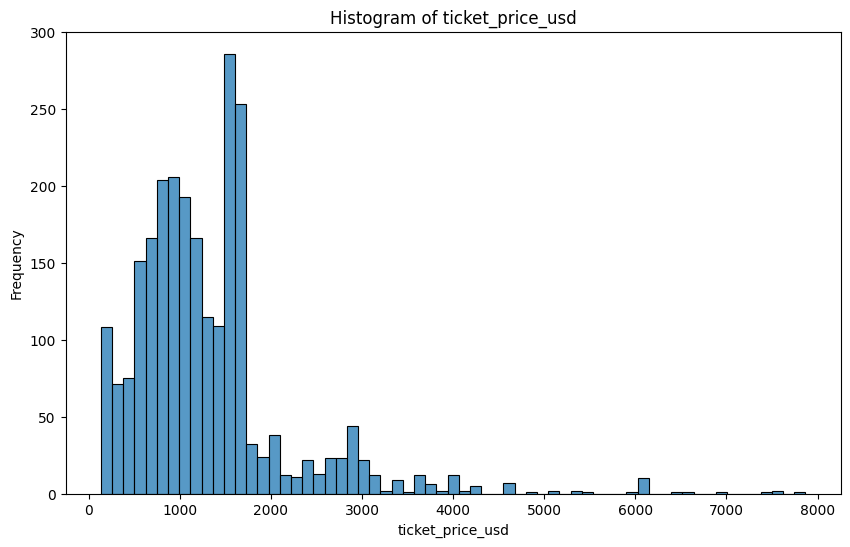

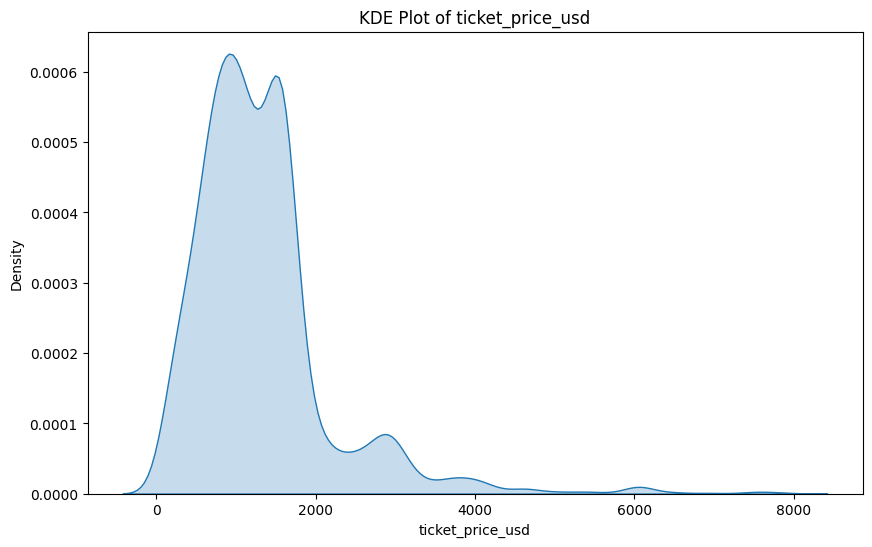

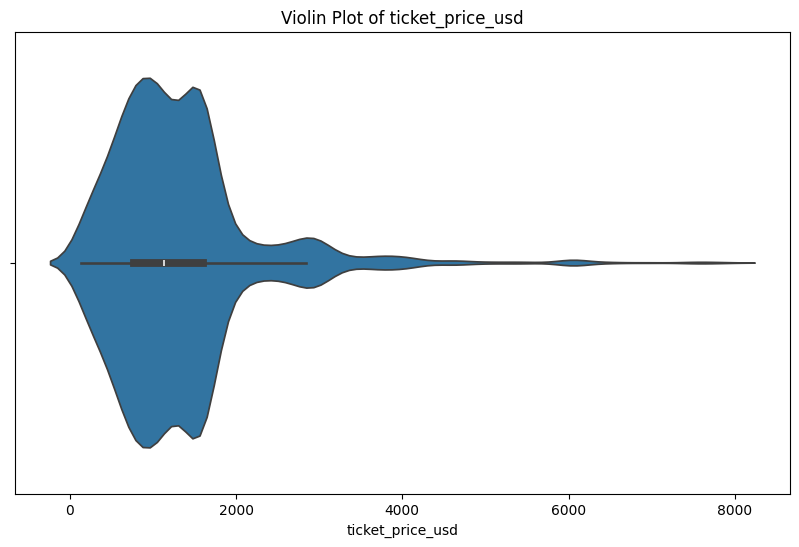

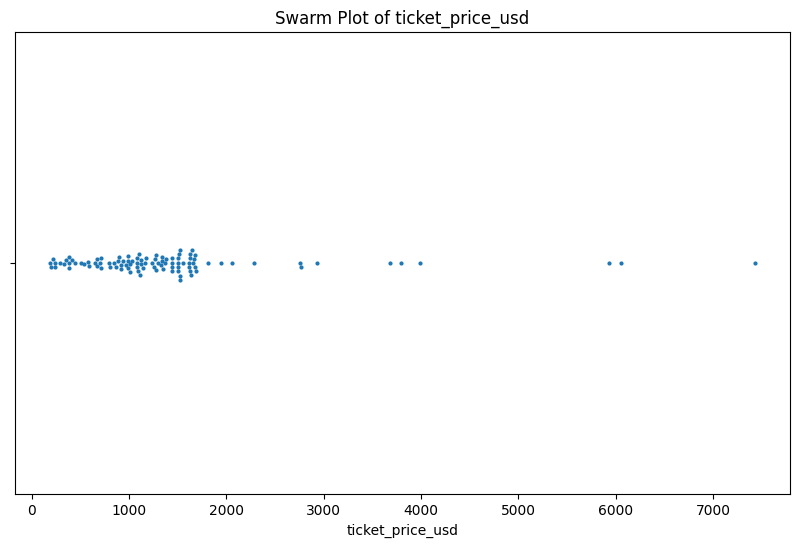

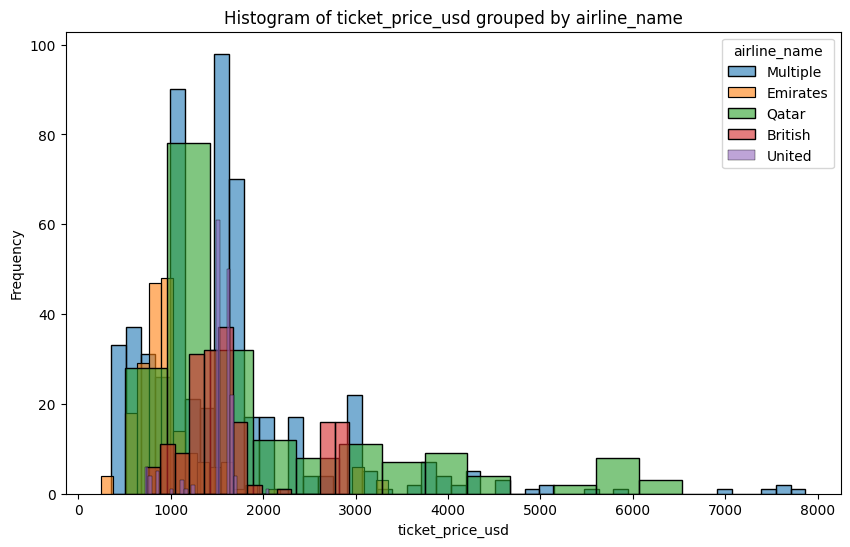

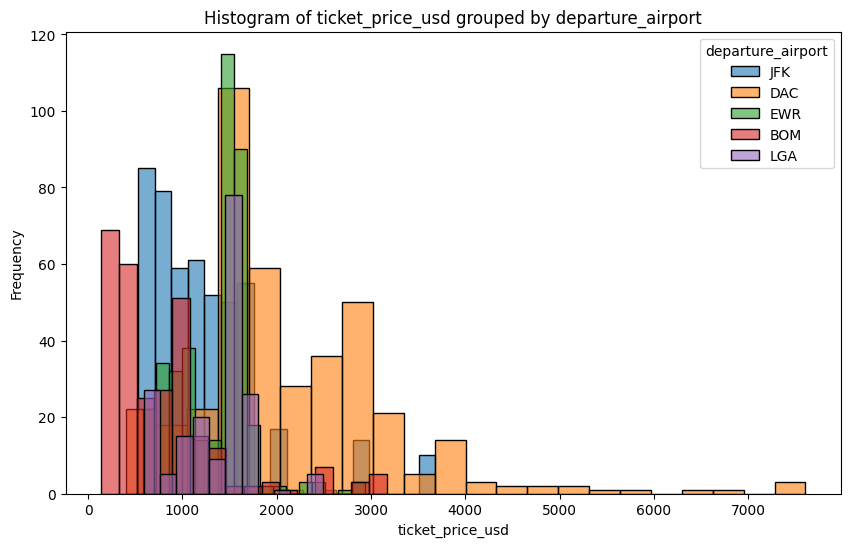

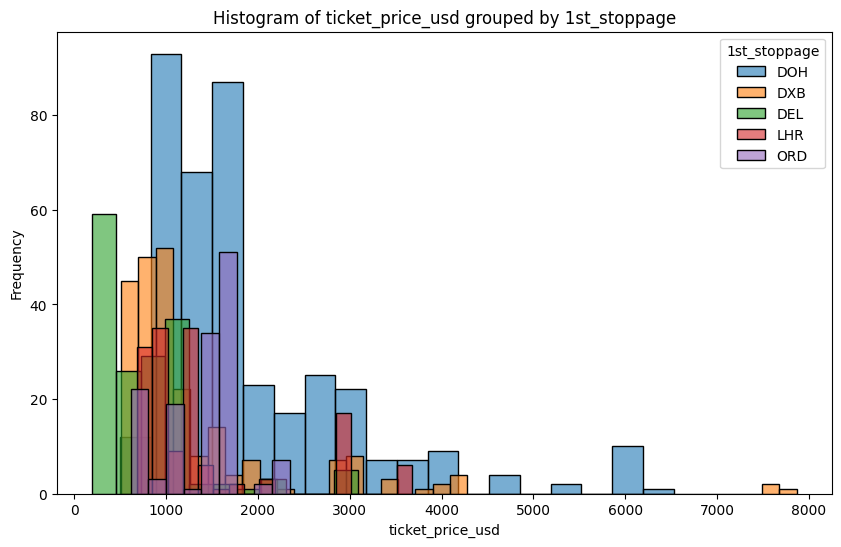

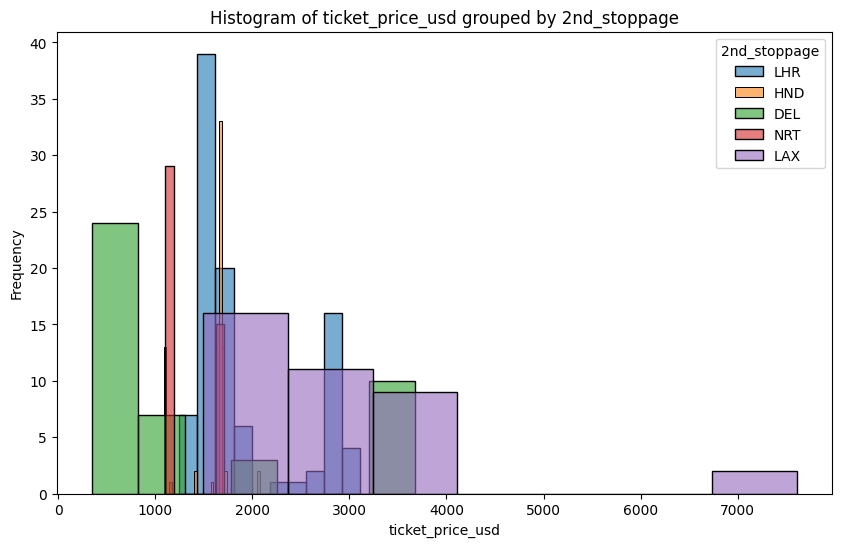

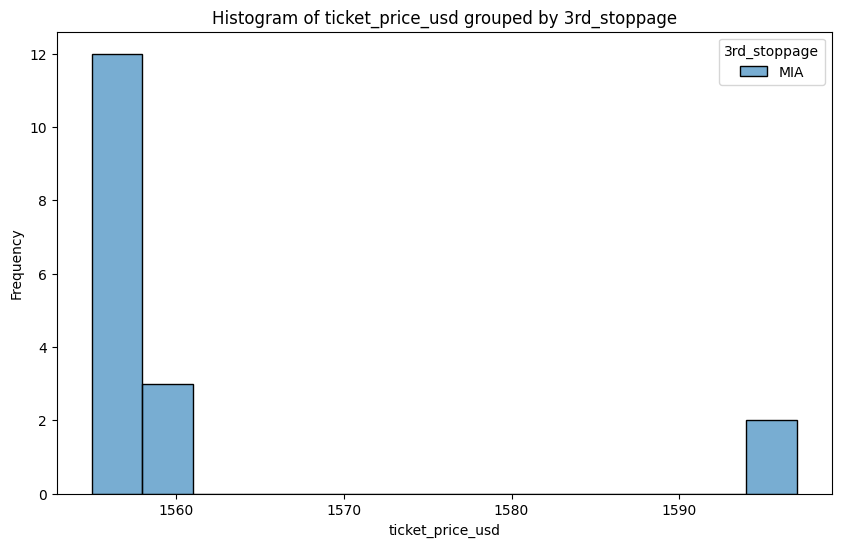

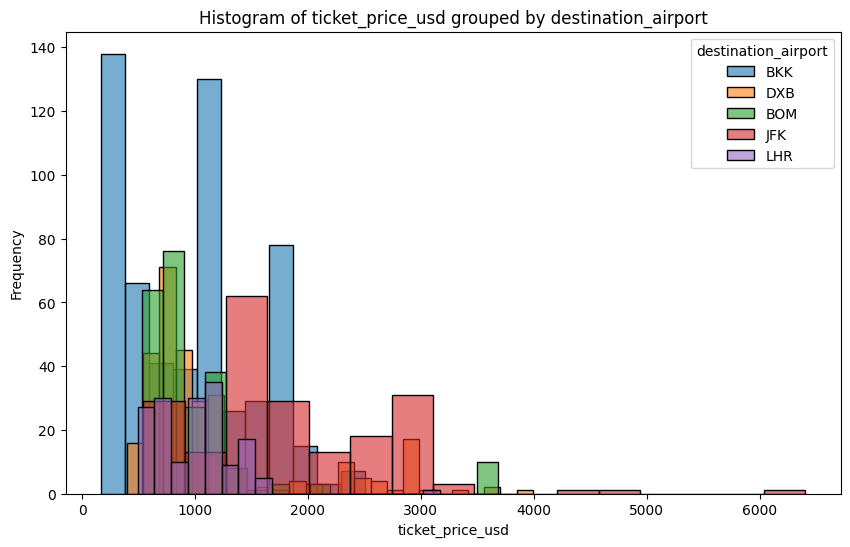

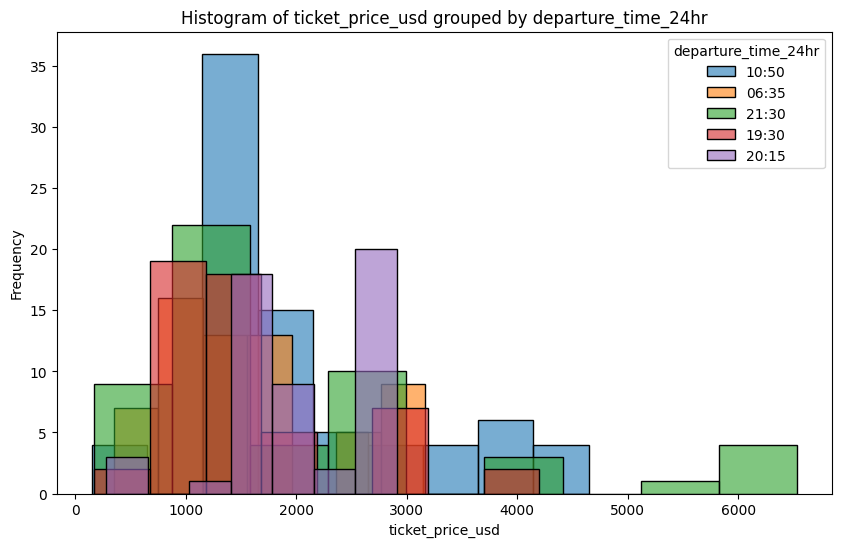

In [23]:

analyze_column(df, 'ticket_price_usd', sample_amt=100, output_to_pdf=False)


# FLIGHT DELAY DATASET ANALYSIS

In [ ]:
'''FLIGHT DELAY DATASET'''
fname = "delay_data_clean_no_encode.csv"
dataset_name = "delay"
df = pd.read_csv(fname)

n_samples = 1000
generate_plots(df, sample_amt=n_samples,output_to_pdf=True, ds_name=dataset_name)

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Us

KeyboardInterrupt: 

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


# USDOT ONTIME DATASET ANALYSIS

In [ ]:
'''USDOT ONTIME DATASET'''
fname = "usdot_onetime_clean_no_encode.csv"
dataset_name = "usdot"
df = pd.read_csv(fname)

n_samples = 1000
generate_plots(df, n_samples, True, dataset_name)

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.